In [9]:
%matplotlib inline
import noise
import numpy as np
import matplotlib
import plotly
import plotly.graph_objects as go
from IPython.core.display import HTML
from mpl_toolkits.mplot3d import axes3d

In [10]:
shape = (50,50)
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

In [11]:
world = np.zeros(shape)

for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale,
                                    j/scale,
                                    octaves=octaves,
                                    persistence=persistence,
                                    lacunarity=lacunarity,
                                    repeatx=1024,
                                    repeaty=1024,
                                    base=42)

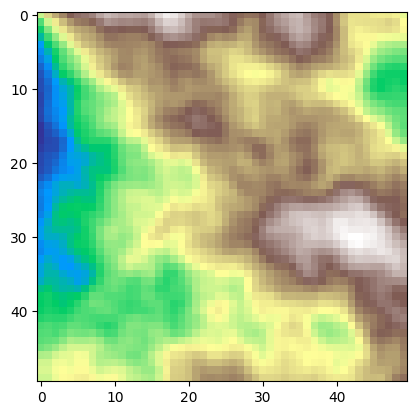

In [12]:
matplotlib.pyplot.imshow(world, cmap='terrain')

In [13]:
lin_x = np.linspace(0,1,shape[0],endpoint=False)
lin_y = np.linspace(0,1,shape[1],endpoint=False)

print(f"len x: {len(lin_x)}, len y: {len(lin_y)}")

x,y = np.meshgrid(lin_x,lin_y,indexing='ij')

len x: 50, len y: 50


len x: 50, len y: 50, shape: (50, 50) 


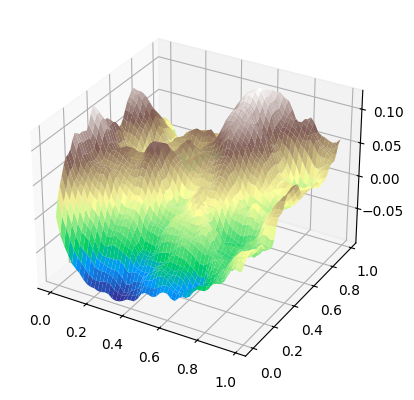

In [14]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

print(f"len x: {len(x)}, len y: {len(y)}, shape: {world.shape} ")

ax.plot_surface(x, y, world,cmap="terrain")

In [15]:
terrain_cmap = matplotlib.colormaps.get_cmap('terrain')

def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1.0)
    pl_colorscale = []
    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*256))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
    return pl_colorscale

terrain = matplotlib_to_plotly(terrain_cmap, 255)

In [16]:
plotly.offline.init_notebook_mode(connected=True)

fig = go.Figure(data=[go.Surface(colorscale=terrain, z=world)])
fig.update_layout(title='Random 3D Terrain')

html = plotly.offline.plot(fig, filename='3d-terrain-plotly.html', include_plotlyjs='cdn')

In [17]:
HTML(html)